In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pathlib as plib
import sys

In [5]:
sys.path.append(".")

sys.path.append("../../data")

In [15]:
#Copy path from visual studio code
# /Users/jonathan/Desktop/epfl/ma3/signal/COM-514-projects/diffusercam/data/results/log_3012105812.csv
path = "/Users/jonathan/Desktop/epfl/ma3/signal/COM-514-projects/diffusercam/"
#Copy relative path from visual studio code
dfs_names = [
"data/results/log_3012100242.csv",
"data/results/log_3012101221.csv",
"data/results/log_3012101646.csv",
"data/results/log_3012102120.csv",
"data/results/log_3012102538.csv",
"data/results/log_3012102939.csv",
"data/results/log_3012103311.csv",
"data/results/log_3012103913.csv",
"data/results/log_3012104359.csv",
"data/results/log_3012104829.csv",
"data/results/log_3012105358.csv",
"data/results/log_3012105812.csv"
]

In [16]:
dfs = []
for s in dfs_names :
    df = pd.read_csv(path + s)
    dfs.append(df)
df = pd.concat(dfs)

In [17]:
df

,Unnamed: 0,image_name,regularisation,lambda,mse,psnr,ssim,lpips,final_loss,timestamp,runtime
0,0,photo06_rgb.png,dct,0.047642,0.036167,14.416915,0.429446,0.724952,0.001726,3012100242,209.270527
0,0,photo06_rgb.png,non-neg,0.041312,0.018261,17.384819,0.477634,0.706834,0.000347,3012101221,214.083701
0,0,photo06_rgb.png,lasso,0.000017,0.018638,17.295943,0.461661,0.702254,0.000216,3012101646,198.563311
0,0,photo06_rgb.png,l2,0.007470,0.019105,17.188465,0.458012,0.700688,0.000222,3012102120,195.064794
0,0,photo07_rgb.png,dct,0.001723,0.040520,13.923264,0.585487,0.760387,0.000270,3012102538,188.784557
0,0,photo07_rgb.png,non-neg,0.052574,0.021749,16.625544,0.553942,0.740763,0.000256,3012102939,171.352651
0,0,photo07_rgb.png,l2,0.000034,0.026918,15.699601,0.606911,0.735347,0.000252,3012103311,130.665707
0,0,photo08_rgb.png,huber-non-neg,0.000068,0.034066,14.676822,0.386050,0.781456,0.000233,3012103913,275.216084
0,0,photo08_rgb.png,lasso,0.066937,0.074261,11.292364,0.138657,0.750505,0.016983,3012104359,223.094922
0,0,photo08_rgb.png,non-neg,0.079360,0.034066,14.676822,0.386050,0.781456,0.000233,3012104829,210.945450


In [18]:
df.to_csv(path + 'data/results/log_results.csv')

In [14]:
len(df)

11

In [37]:
metrics = ['mse', 'psnr', 'ssim', 'lpips'] 

In [26]:
df[df['regularisation']=='lasso'][cols]

,lambda,mse,psnr,ssim,lpips
0,0.000006,0.243803,6.129610,0.33140,0.404750
1,0.000010,0.243814,6.129408,0.33128,0.404753


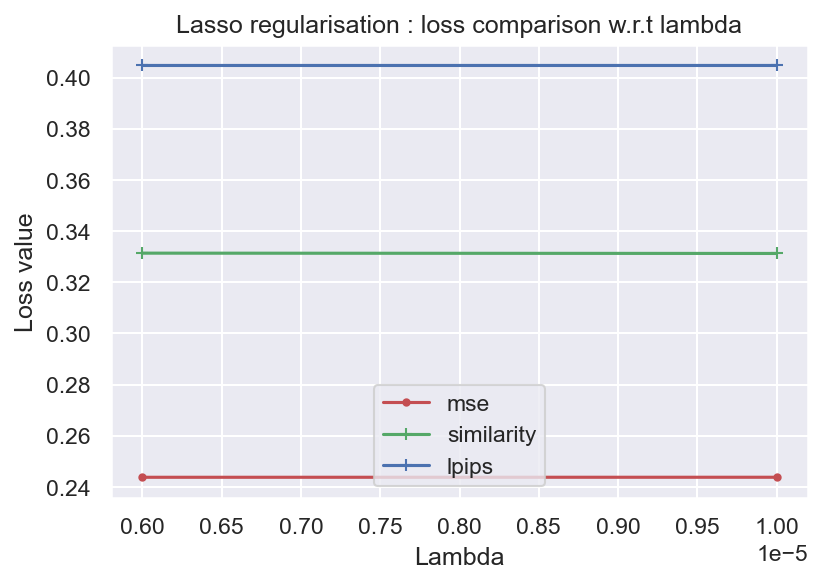

In [49]:
# multiple lines with legend
x = df[df['regularisation']=='lasso']['lambda']
y = df[df['regularisation']=='lasso'][metrics]
#Better Resolution
plt.figure(dpi=150)
plt.plot(x,y['mse'],marker='.', color='r', label= 'mse')
plt.plot(x,y['ssim'], marker = '+', color = 'g',label = 'similarity')
plt.plot(x,y['lpips'], marker = '+', color = 'b',label = 'lpips')

plt.title('Lasso regularisation : loss comparison w.r.t lambda')
plt.ylabel('Loss value')
plt.xlabel('Lambda')
plt.legend();

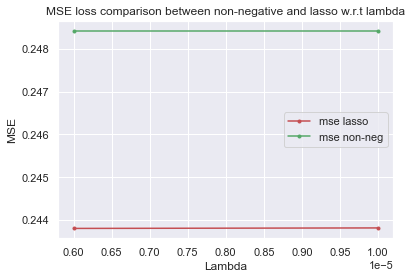

In [50]:
# multiple lines with legend
x1 = df[df['regularisation']=='lasso']['lambda']
y1 = df[df['regularisation']=='lasso'][metrics]
x2 = df[df['regularisation']=='non-neg']['lambda']
y2 = df[df['regularisation']=='non-neg'][metrics]

plt.plot(x1,y1['mse'],marker='.', color='r', label= 'mse lasso')
plt.plot(x2,y2['mse'],marker='.', color='g', label= 'mse non-neg')

plt.title('MSE loss comparison between non-negative and lasso w.r.t lambda')
plt.ylabel('MSE')
plt.xlabel('Lambda')
plt.legend();